<a href="https://colab.research.google.com/github/MungaiMwangi001/Deep_Learning/blob/main/manual_linear_regression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

**set the input and output data**

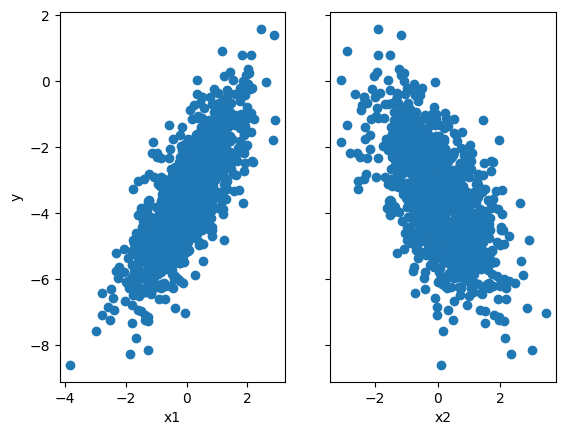

In [38]:
#set  random seed for reproducability
#Ensures that the random numbers generated by
#PyTorch are the same every time you run the code.
torch.manual_seed(42)

#Set number of samples
#Specifies how many data points to generate for the dataset.
num_samples = 1000

#create random features with 2 dimensions
#These are the input features for the synthetic dataset.
x = torch.randn(num_samples,2)

#create rnadom weights and bias for the linear regression model
true_weights = torch.tensor([1.3, -1])
true_bias = torch.tensor([-3.5])

#Target variable
y = x @ true_weights.T + true_bias

#plot the dataset
fig,ax = plt.subplots(1, 2, sharey=True)
ax[0].scatter(x[:,0],y)
ax[1].scatter(x[:,1],y)


ax[0].set_xlabel('x1')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x2')
plt.show()



In [39]:

#Define the Model

class linearRegression(nn.Module):# base class for all neural networks in PyTorch.
    def __init__(self,input_dim,output_dim):
        super(linearRegression,self).__init__()
        #nn.Linear automatically creates:
       # A weight matrix of shape (output_dim, input_dim)
        # A bias vector of shape (output_dim,)
        self.linear = nn.Linear(input_dim,output_dim)

#defines how the model computes output from input.
    def forward(self,x):
        return self.linear(x)

#Define the input and output dimensions
input_dim = x.shape[1]
output_dim = 1

#Create/instantiate  the model
model = linearRegression(input_dim, output_dim)

**manually set the model parameter**



In [40]:
# create a random weight & bias tensor
weight = torch.randn(1, input_dim)
bias   = torch.rand(1)

# create a nn.Parameter object from the weight & bias tensor
#nn.Parameter tells PyTorch to treat these as trainable parameters,
#so model.parameters() will include them and optimizers can update them.
weight_param = nn.Parameter(weight)
bias_param   = nn.Parameter(bias)

# assign the weight & bias parameter to the linear layer
model.linear.weight = weight_param
model.linear.bias   = bias_param

weight, bias = model.parameters()
print('Weight :',weight)
print('bias :',bias)

Weight : Parameter containing:
tensor([[-0.3239,  0.5574]], requires_grad=True)
bias : Parameter containing:
tensor([0.5710], requires_grad=True)


prediction

In [41]:
y_p = model(x)
print(y_p[:5])

tensor([[ 0.7760],
        [-0.8944],
        [-0.3369],
        [-0.3095],
        [ 1.7338]], grad_fn=<SliceBackward0>)


**define the loss function**

Here we are calculating the Mean Squared Error by taking the square of the difference between the actual and the predicted value and then dividing it by its length (i.e n = the Total number of output or target values) which is the mean of squared errors.

In [42]:
# Define the loss function
def Mean_Squared_Error(prediction, actual):
    error = (actual-prediction)**2
    return error.mean()


# Find the total mean squared error
loss = Mean_Squared_Error(y_p, y)
loss

tensor(19.9126, grad_fn=<MeanBackward0>)

All the steps which are done till now are known as forward propagation.



**Implementations of the Gradient Descent algorithm for the above model**

Steps:

1. Find the gradient using loss.backward()

2.Get the parameter using model.linear.weight and model.linear.bias

3. Update the parameter using the above-defined equation.

4. Again assign the model parameter to our **model**


#find the gradient using loss.backward()

#learning_rate
learning_rate = 0.001

#model_parameter
w = model.linear.weight
b = model.linear.bias


#mutually update the model parameter
w -= learning_rate * w.grad
b -= learning_rate * b.grad



# assign the weight & bias parameter to the linear layer
model.linear.weight = nn.Parameter(w)
model.linear.bias   = nn.Parameter(b)





Epoch [100/1000], weight[[-0.00295633  0.00378834]], bias[-3.478614], loss: 2.4949
Epoch [200/1000], weight[[-0.00231887  0.00292433]], bias[-3.4896348], loss: 2.4937
Epoch [300/1000], weight[[-0.00181315  0.00224897]], bias[-3.4986506], loss: 2.4929
Epoch [400/1000], weight[[-0.00141272  0.00172226]], bias[-3.506027], loss: 2.4923
Epoch [500/1000], weight[[-0.00109635  0.00131249]], bias[-3.5120625], loss: 2.4919
Epoch [600/1000], weight[[-0.00084698  0.00099459]], bias[-3.5170012], loss: 2.4917
Epoch [700/1000], weight[[-0.00065094  0.00074872]], bias[-3.521042], loss: 2.4915
Epoch [800/1000], weight[[-0.00049727  0.00055921]], bias[-3.5243485], loss: 2.4914
Epoch [900/1000], weight[[-0.00037719  0.00041373]], bias[-3.5270545], loss: 2.4913
Epoch [1000/1000], weight[[-0.00028371  0.00030255]], bias[-3.5292687], loss: 2.4913


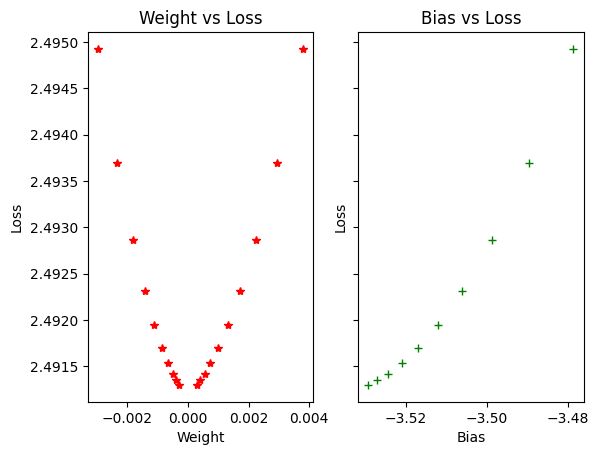

In [47]:
# Number of epochs
num_epochs = 1000

#learning rate
learning_rate = 0.001

# SUBPLOT  WEIGHT & BIAS  VS LOSSES

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for epoch in range(num_epochs):
    # Forward pass
    y_p = model(x)

    # Compute loss
    loss = Mean_Squared_Error(y_p, y)


    # Backpropagation
    loss.backward()

    #learning Rate
    learning_rate = 0.001

    #model parameter
    w = model.linear.weight
    b = model.linear.bias

    # Manual Gradient Descent Update
    w = w - learning_rate * w.grad
    b = b - learning_rate * b.grad

    # assign the weight & bias parameter to the linear layer
    model.linear.weight = nn.Parameter(w)
    model.linear.bias   = nn.Parameter(b)

    #ensures that the following code runs every 100 epochs
    if (epoch+1) % 100 == 0:
      #Plot the weight value versus the loss on the first subplot
      #w.detach() removes the tensor from the computation graph to avoid unnecessary gradient tracking.
      #.numpy() converts the tensor to a NumPy array (so it can be plotted).
       ax1.plot(w.detach().numpy(), loss.item(), 'r*-')
       ax2.plot(b.detach().numpy(), loss.item(), 'g+-')

      #Prints a formatted message showing:

#The current epoch ,weight value, bias value, current loss
       print('Epoch [{}/{}], weight{}, bias{}, loss: {:.4f}'.format(
           epoch+1, num_epochs,
           w.detach().numpy(),
           b.detach().numpy(),
           loss.item()))



ax1.set_xlabel('Weight')
ax1.set_ylabel('Loss')
ax1.set_title('Weight vs Loss')

ax2.set_title('Bias vs Loss')
ax2.set_xlabel('Bias')
ax2.set_ylabel('Loss')
plt.show()

**From the above graph and data, we can observe the Losses are decreasing as per the weight and bias variations.**

In [48]:
#optimal weight and bias values
#Retrieves the current weight and bias  tensor from the linear layer of your model.
w = model.linear.weight
b = model.linear.bias

print('weight(w) = {} \n bias(b) = {}'.format(
    w.abs(), b.abs() #makes it easier to compare magnitudes regardless of sign.
))

weight(w) = tensor([[0.0003, 0.0003]], grad_fn=<AbsBackward0>) 
 bias(b) = tensor([3.5293], grad_fn=<AbsBackward0>)


In [50]:
#prediction
pred = x @ w.T + b
print(pred[:5])

tensor([[-3.5294],
        [-3.5302],
        [-3.5298],
        [-3.5297],
        [-3.5286]], grad_fn=<SliceBackward0>)
